In [18]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import KNNImputer
from itertools import product
from scipy.stats import skewnorm
# for better resolution plots
# %config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style


# Data Exploration

In [19]:
path = "C:/Users/Asus FX516P 9775/Documents/GitHub/data-mining/src"

dataCustomer: DataFrame = pd.read_csv(path + "/data/DM_AIAI_CustomerDB.csv")
dataFlights: DataFrame = pd.read_csv(path + "/data/DM_AIAI_FlightsDB.csv")


print("Shape of dataset:", dataCustomer.shape)
print("Shape of dataset:", dataFlights.shape)
print("\nInfo")
print(dataCustomer.info)
print(dataFlights.info)
print("\nSummary:")
print(dataCustomer.describe(include="all").T)
print(dataFlights.describe(include="all").T)

Shape of dataset: (16921, 21)
Shape of dataset: (608436, 10)

Info
<bound method DataFrame.info of        Unnamed: 0  Loyalty# First Name    Last Name        Customer Name  \
0               0    480934    Cecilia  Householder  Cecilia Householder   
1               1    549612      Dayle        Menez          Dayle Menez   
2               2    429460     Necole       Hannon        Necole Hannon   
3               3    608370      Queen        Hagee          Queen Hagee   
4               4    530508     Claire      Latting       Claire Latting   
...           ...       ...        ...          ...                  ...   
16916          15    100012      Ethan     Thompson       Ethan Thompson   
16917          16    100013      Layla        Young          Layla Young   
16918          17    100014     Amelia      Bennett       Amelia Bennett   
16919          18    100015   Benjamin       Wilson      Benjamin Wilson   
16920          19    100016       Emma       Martin          Emma

In [20]:
#First Three rows of Customers
dataCustomer.head(3)

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,...,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
1,1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,...,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
2,2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard


In [21]:
#First three rows of flights
dataFlights.head(3)

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
0,413052,2021,12,12/1/2021,2.0,2.0,9384.0,938.0,0.0,0.0
1,464105,2021,12,12/1/2021,0.0,0.0,0.0,0.0,0.0,0.0
2,681785,2021,12,12/1/2021,10.0,3.0,14745.0,1474.0,0.0,0.0


In [22]:
dataCustomer.shape

(16921, 21)

In [23]:

dataFlights.shape

(608436, 10)

In [24]:
dataCustomer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               16921 non-null  int64  
 1   Loyalty#                 16921 non-null  int64  
 2   First Name               16921 non-null  object 
 3   Last Name                16921 non-null  object 
 4   Customer Name            16921 non-null  object 
 5   Country                  16921 non-null  object 
 6   Province or State        16921 non-null  object 
 7   City                     16921 non-null  object 
 8   Latitude                 16921 non-null  float64
 9   Longitude                16921 non-null  float64
 10  Postal code              16921 non-null  object 
 11  Gender                   16921 non-null  object 
 12  Education                16921 non-null  object 
 13  Location Code            16921 non-null  object 
 14  Income                

In [25]:
dataFlights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608436 entries, 0 to 608435
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loyalty#                  608436 non-null  int64  
 1   Year                      608436 non-null  int64  
 2   Month                     608436 non-null  int64  
 3   YearMonthDate             608436 non-null  object 
 4   NumFlights                608436 non-null  float64
 5   NumFlightsWithCompanions  608436 non-null  float64
 6   DistanceKM                608436 non-null  float64
 7   PointsAccumulated         608436 non-null  float64
 8   PointsRedeemed            608436 non-null  float64
 9   DollarCostPointsRedeemed  608436 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 46.4+ MB


In [26]:
dataCustomer.describe()

,Unnamed: 0,Loyalty#,Latitude,Longitude,Income,Customer Lifetime Value
count,16921.000000,16921.000000,16921.000000,16921.000000,16901.000000,16901.000000
mean,8440.023639,550197.393771,47.174500,-91.814768,37758.038400,7990.460188
std,4884.775439,259251.503597,3.307971,22.242429,30368.992499,6863.173093
min,0.000000,100011.000000,42.984924,-135.056840,0.000000,1898.010000
25%,4210.000000,326823.000000,44.231171,-120.237660,0.000000,3979.720000
50%,8440.000000,550896.000000,46.087818,-79.383186,34161.000000,5780.180000
75%,12670.000000,772438.000000,49.282730,-74.596184,62396.000000,8945.690000
max,16900.000000,999999.000000,60.721188,-52.712578,99981.000000,83325.380000


In [27]:
dataFlights.describe()

,Loyalty#,Year,Month,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
count,608436.000000,608436.000000,608436.000000,608436.000000,608436.000000,608436.000000,608436.000000,608436.000000,608436.000000
mean,550037.873084,2020.000000,6.500000,3.908107,0.983944,7939.341419,793.777781,235.251678,2.324835
std,258935.180575,0.816497,3.452055,5.057889,2.003785,10260.421873,1025.918521,983.233374,9.725168
min,100018.000000,2019.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,326961.000000,2019.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,550834.000000,2020.000000,6.500000,0.000000,0.000000,856.400000,85.275000,0.000000,0.000000
75%,772194.000000,2021.000000,9.250000,7.200000,0.900000,15338.175000,1533.712500,0.000000,0.000000
max,999986.000000,2021.000000,12.000000,21.000000,11.000000,42040.000000,4204.000000,7496.000000,74.000000


In [28]:
dataCustomer.describe(include=object)

,First Name,Last Name,Customer Name,Country,Province or State,City,Postal code,Gender,Education,Location Code,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,EnrollmentType
count,16921,16921,16921,16921,16921,16921,16921,16921,16921,16921,16921,16921,16921,2310,16921
unique,4941,15404,16921,1,11,29,75,2,5,3,3,3,2449,1260,2
top,Deon,Salberg,Emma Martin,Canada,Ontario,Toronto,V6E 3D9,female,Bachelor,Suburban,Married,Star,4/3/2015,7/7/2020,Standard
freq,13,4,1,16921,5468,3390,917,8497,10586,5716,9842,7761,34,8,15773


In [29]:
dataCustomer.duplicated().sum()
dataCustomer.drop_duplicates()

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,...,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
1,1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,...,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
2,2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
3,3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,...,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
4,4,530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,...,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16916,15,100012,Ethan,Thompson,Ethan Thompson,Canada,Quebec,Quebec City,46.759733,-71.141009,...,male,Bachelor,Suburban,NaN,Single,Star,2/27/2019,2/27/2019,NaN,Standard
16917,16,100013,Layla,Young,Layla Young,Canada,Alberta,Edmonton,53.524829,-113.546357,...,female,Bachelor,Rural,NaN,Married,Star,9/20/2017,9/20/2017,NaN,Standard
16918,17,100014,Amelia,Bennett,Amelia Bennett,Canada,New Brunswick,Moncton,46.051866,-64.825428,...,male,Bachelor,Rural,NaN,Married,Star,11/28/2020,11/28/2020,NaN,Standard
16919,18,100015,Benjamin,Wilson,Benjamin Wilson,Canada,Quebec,Quebec City,46.862970,-71.133444,...,female,College,Urban,NaN,Married,Star,4/9/2020,4/9/2020,NaN,Standard


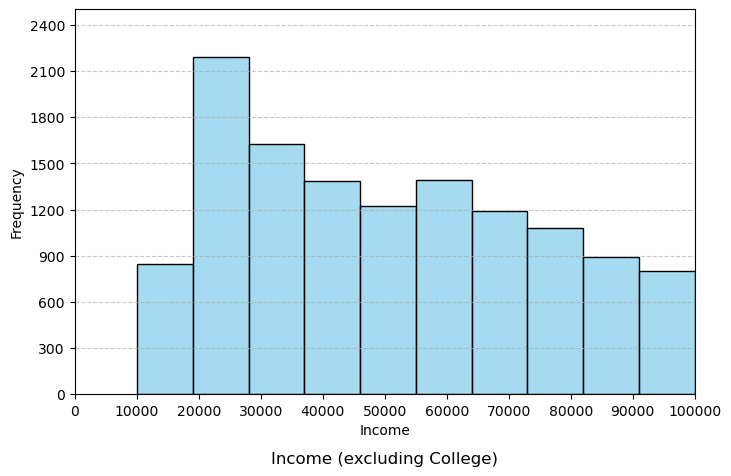

In [30]:
#Simple Graph just checking incomes


filtered_data = dataCustomer[dataCustomer["Education"] != "College"]

plt.figure(figsize=(8,5))
sns.histplot(filtered_data["Income"], bins=10, color="skyblue", edgecolor="black")
plt.title("Income (excluding College)", y=-0.2)
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.xlim(0, 100000)
plt.xticks(np.arange(0, 100001, 10000))
plt.ylim(0, 2500)
plt.yticks(np.arange(0, 2501, 300))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [31]:
#Graph might not make sense, maybe delete later 
#I realized that all customers are from Canada and not around the world
#Making this graph useless in a way



fig = px.scatter_geo(
    dataCustomer,
    lat='Latitude',
    lon='Longitude',
    scope='north america',
    projection='natural earth',  
)
fig.update_geos(
    visible=False,
    resolution=50,
    scope="north america",
    center=dict(lat=56, lon=-106), 
    lataxis_range=[41, 84],         
    lonaxis_range=[-141, -52]       
)

fig.update_traces(marker=dict(size=5, color='red')) 

fig.update_layout(
    title='World Map with Points',
    geo=dict(showland=True, landcolor='lightgray')
)

fig.show()

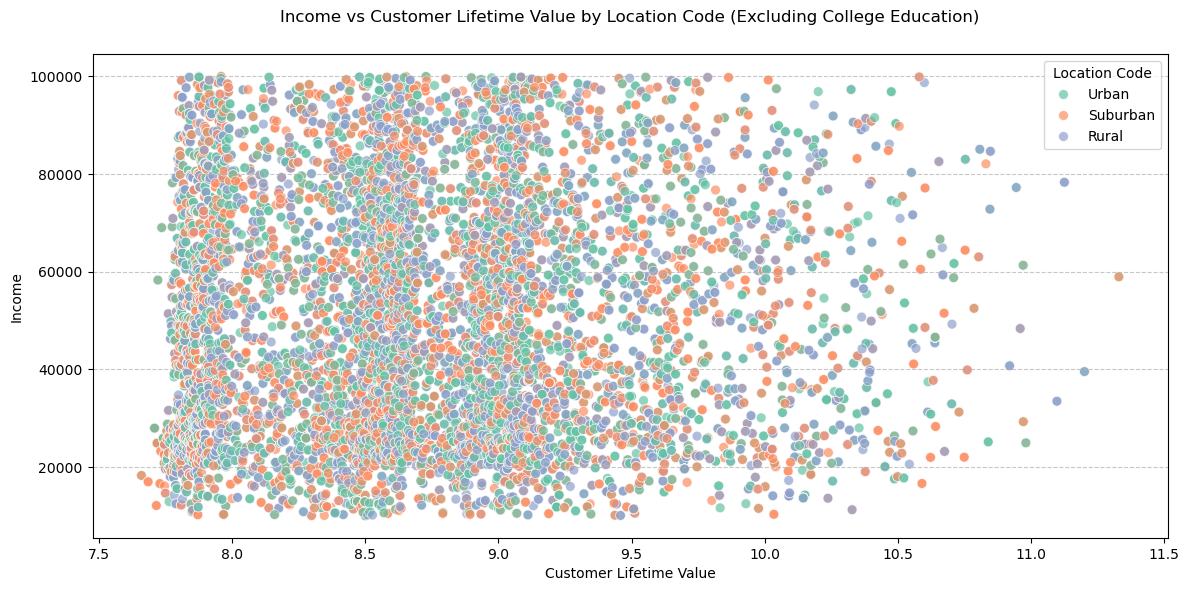

In [32]:
#I had an idea couldn't put it to work tho
#Might delete later

import math 
dataCustomer_filtered = dataCustomer[dataCustomer["Education"] != "College"] #Removed College because the income of all college customers is 0

plt.figure(figsize=(12,6))
sns.scatterplot(
    
    data=dataCustomer_filtered,
    x=dataCustomer_filtered["Customer Lifetime Value"].apply(lambda x:math.log(x)),
    y="Income",
    hue="Location Code",   
    palette="Set2",
    s=50,                 
    alpha=0.7              
)
plt.title("Income vs Customer Lifetime Value by Location Code (Excluding College Education)", y=1.05)
plt.xlabel("Customer Lifetime Value")
plt.ylabel("Income")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

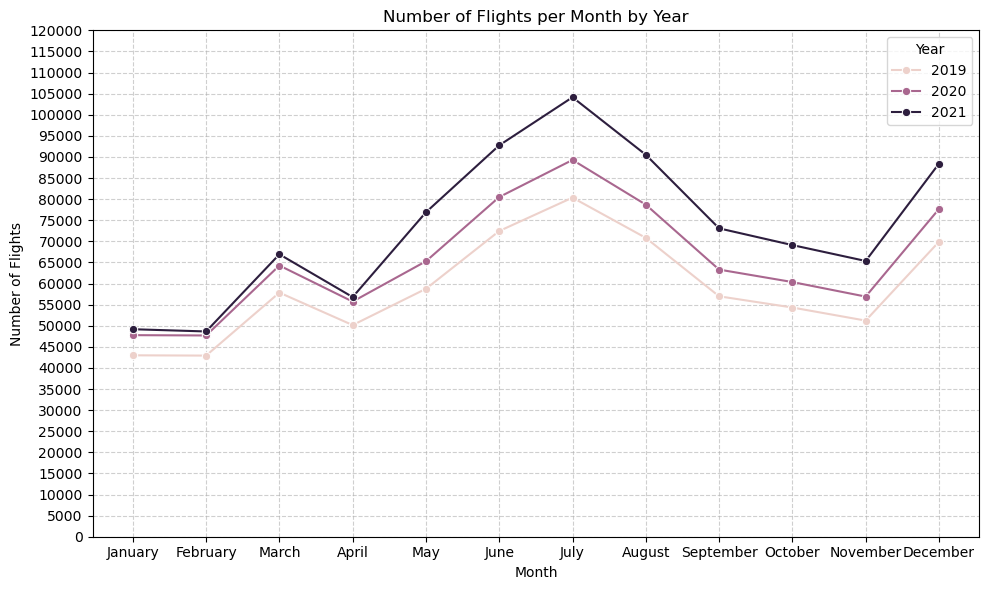

In [33]:
#This next graph checks the flights per month in each year
#Grouping the data by year and month and checking the sum of the flights of each one
#Then we organize the months by order
#Used seaborn to create a line plot that has x = the months and y = the number of flights






dataFlights["YearMonthDate"] = pd.to_datetime(dataFlights["YearMonthDate"], errors="coerce")
dataFlights["Month"] = dataFlights["YearMonthDate"].dt.month_name()
dataFlights["Year"] = dataFlights["YearMonthDate"].dt.year
flights_per_month = (
    dataFlights.groupby(["Year", "Month"])["NumFlights"]
    .sum()
    .reset_index()
)
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

flights_per_month["Month"] = pd.Categorical(
    flights_per_month["Month"], categories=month_order, ordered=True
)

flights_per_month = flights_per_month.sort_values(["Year", "Month"])
plt.figure(figsize=(10,6))
sns.lineplot(
    data=flights_per_month,
    x="Month",
    y="NumFlights",
    hue="Year",        
    marker="o"
)
plt.title("Number of Flights per Month by Year")
plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.grid(True, linestyle="--", alpha=0.6)
plt.ylim(0, 120000)
plt.yticks(np.arange(0, 120001, 5000))
plt.tight_layout()
plt.show()

C:\Users\Asus FX516P 9775\AppData\Local\Temp\ipykernel_12172\1201907915.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




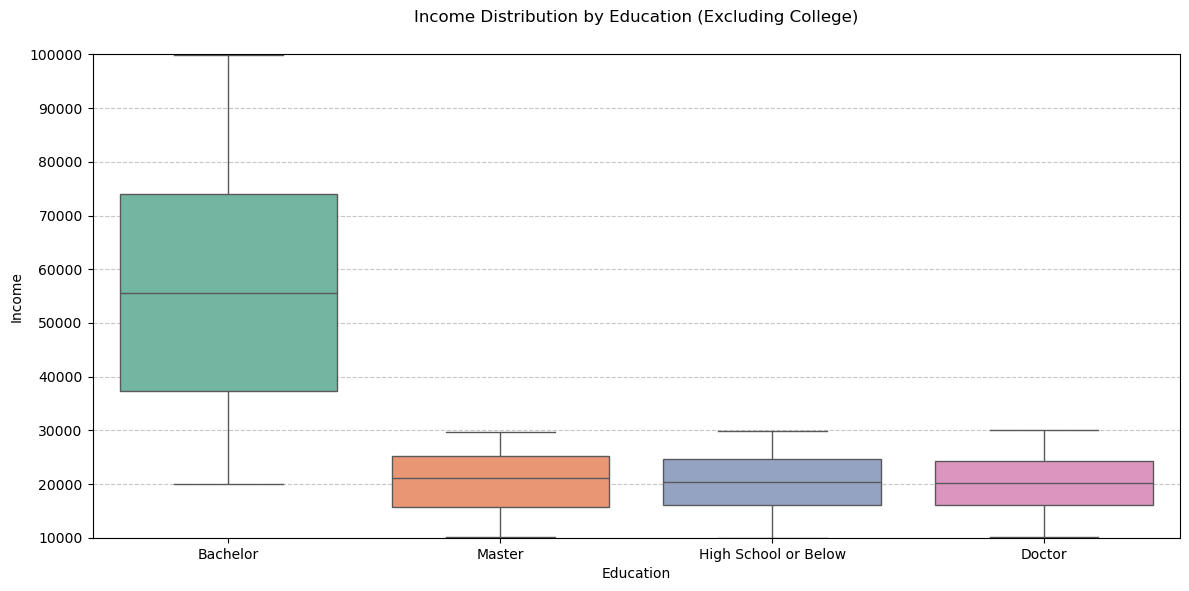

In [35]:
dataCustomer_filtered = dataCustomer[dataCustomer["Education"] != "College"]  #removed College again cause income = 0 

plt.figure(figsize=(12,6))
sns.boxplot(
    data=dataCustomer_filtered,
    x="Education",
    y="Income",
    palette="Set2"
)

plt.title("Income Distribution by Education (Excluding College)", y=1.05)
plt.xlabel("Education")
plt.ylabel("Income")


min_income = int(dataCustomer_filtered["Income"].min() // 10000 * 10000)
max_income = int(dataCustomer_filtered["Income"].max() // 10000 * 10000 + 10000)
plt.ylim(min_income, max_income)
plt.yticks(np.arange(min_income, max_income + 1, 10000))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


([<matplotlib.axis.YTick at 0x1ffaa905a90>,
 [Text(0, 0, '0'),
  Text(0, 250, '250'),
  Text(0, 500, '500'),
  Text(0, 750, '750'),
  Text(0, 1000, '1000'),
  Text(0, 1250, '1250'),
  Text(0, 1500, '1500'),
  Text(0, 1750, '1750'),
  Text(0, 2000, '2000'),
  Text(0, 2250, '2250'),
  Text(0, 2500, '2500'),
  Text(0, 2750, '2750'),
  Text(0, 3000, '3000'),
  Text(0, 3250, '3250'),
  Text(0, 3500, '3500'),
  Text(0, 3750, '3750'),
  Text(0, 4000, '4000')])

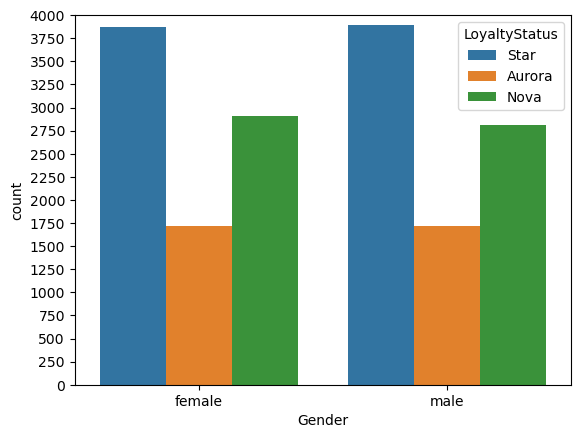

In [20]:
#Simple Graph that counts the The type of Loyalty status per gender
#for some reason it ended the same for both genders, might be an error or the data itself


sns.countplot(data=dataCustomer, x="Gender", hue="LoyaltyStatus")
plt.ylim(0, 4001)
plt.yticks(np.arange(0, 4001, 250))

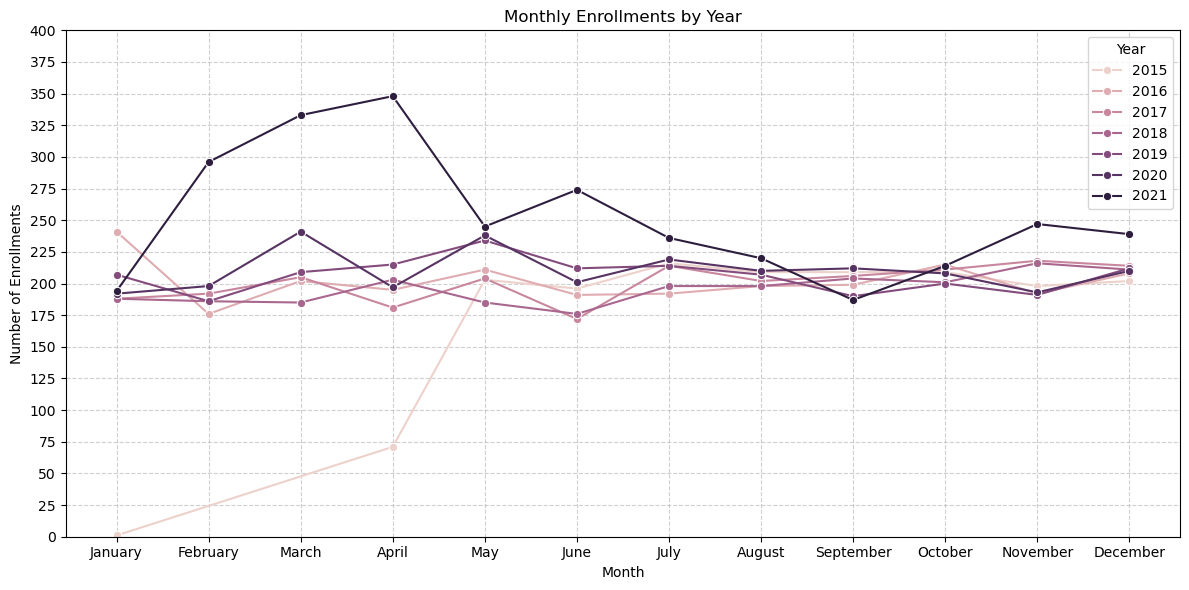

In [21]:
dataCustomer['EnrollmentDateOpening'] = pd.to_datetime(dataCustomer['EnrollmentDateOpening'], errors='coerce')
dataCustomer_valid = dataCustomer.dropna(subset=['EnrollmentDateOpening'])

dataCustomer_valid['Year'] = dataCustomer_valid['EnrollmentDateOpening'].dt.year
dataCustomer_valid['Month'] = dataCustomer_valid['EnrollmentDateOpening'].dt.month_name()


enrollments_per_month = (
    dataCustomer_valid.groupby(['Year', 'Month'])
    .size()
    .reset_index(name='Enrollments')
)


month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
enrollments_per_month['Month'] = pd.Categorical(enrollments_per_month['Month'], categories=month_order, ordered=True)
enrollments_per_month = enrollments_per_month.sort_values(['Year', 'Month'])


plt.figure(figsize=(12,6))
sns.lineplot(
    data=enrollments_per_month,
    x='Month',
    y='Enrollments',
    hue='Year',
    marker='o'
)
plt.title("Monthly Enrollments by Year")
plt.xlabel("Month")
plt.ylabel("Number of Enrollments")
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, 400)
plt.yticks(np.arange(0, 401, 25))
plt.tight_layout()
plt.show()

## Finding Duplicate Loyalty numbers linked to multiple customer names


In [31]:
dataCustomer["Loyalty#"].duplicated().any()
dataCustomer[dataCustomer['Loyalty#'].duplicated(keep=False)][['Loyalty#']]

dataCustomer['Loyalty#'].value_counts()[lambda x: x > 1]
dataCustomer.groupby('Loyalty#')['Customer Name'].nunique().reset_index(name='UniqueNames').query('UniqueNames > 1')



,Loyalty#,UniqueNames
48,101902,2
120,106001,2
129,106509,2
230,112142,2
278,114414,2
...,...,...
16423,981508,2
16533,988392,2
16559,989528,2
16573,990512,2


# Data Pre-process

## Filling missing Values

In [23]:
dataCustomer_central = dataCustomer.copy()

dataCustomer_central.isna().sum()

 


Unnamed: 0                     0
Loyalty#                       0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14611
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64

In [24]:
numeric_cols = dataCustomer_central.select_dtypes(include='number').columns

for col in numeric_cols:
    if abs(dataCustomer_central[col].skew()) < 0.5:
        dataCustomer_central[col].fillna(dataCustomer_central[col].mean(), inplace=True)
    else:
        dataCustomer_central[col].fillna(dataCustomer_central[col].median(), inplace=True)

C:\Users\Asus FX516P 9775\AppData\Local\Temp\ipykernel_28768\3073696754.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Asus FX516P 9775\AppData\Local\Temp\ipykernel_28768\3073696754.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

In [25]:
dataCustomer_central.isna().sum()

Unnamed: 0                     0
Loyalty#                       0
First Name                     0
Last Name                      0
Customer Name                  0
Country                        0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                         0
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14611
Customer Lifetime Value        0
EnrollmentType                 0
dtype: int64

## Removing Outliers

### Checking biggest outliers percentage to know which column needs filtering

In [26]:
numeric_cols = dataCustomer_central.select_dtypes(include='number').columns

outlier_summary = pd.DataFrame(
    columns=['Q1', 'Q3', 'IQR', 'Lower Bound', 'Upper Bound', 'Outlier Count', 'Outlier %']
)

for col in numeric_cols:
    Q1 = dataCustomer_central[col].quantile(0.25)
    Q3 = dataCustomer_central[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = dataCustomer_central[(dataCustomer_central[col] < lower_bound) | (dataCustomer_central[col] > upper_bound)]
    outlier_summary.loc[col] = [
        Q1,
        Q3,
        IQR,
        lower_bound,
        upper_bound,
        outliers.shape[0],
        round(outliers.shape[0] / dataCustomer_central.shape[0] * 100, 2)
    ]

outlier_summary
outlier_summary.sort_values(by='Outlier %', ascending=False)



,Q1,Q3,IQR,Lower Bound,Upper Bound,Outlier Count,Outlier %
Customer Lifetime Value,3981.780000,8936.820000,4955.040000,-3450.780000,1.636938e+04,1505.0,8.89
Latitude,44.231171,49.282730,5.051559,36.653833,5.686007e+01,112.0,0.66
Loyalty#,326823.000000,772438.000000,445615.000000,-341599.500000,1.440860e+06,0.0,0.00
Unnamed: 0,4210.000000,12670.000000,8460.000000,-8480.000000,2.536000e+04,0.0,0.00
Longitude,-120.237660,-74.596184,45.641476,-188.699874,-6.133970e+00,0.0,0.00
Income,0.000000,62375.000000,62375.000000,-93562.500000,1.559375e+05,0.0,0.00


### After finding out that the customer lifetime value has outliers (excluding latitude which makes sense), we are going to remove those values

<Axes: >

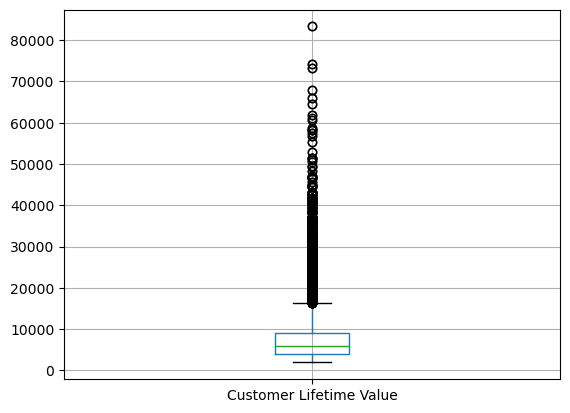

In [27]:
col = "Customer Lifetime Value"

Q1 = dataCustomer_central[col].quantile(0.25)
Q3 = dataCustomer_central[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dataCustomer_central[(dataCustomer_central[col] < lower_bound) | (dataCustomer_central[col] > upper_bound)]

outliers[[col]].head(10)
dataCustomer_central[[col]].boxplot()

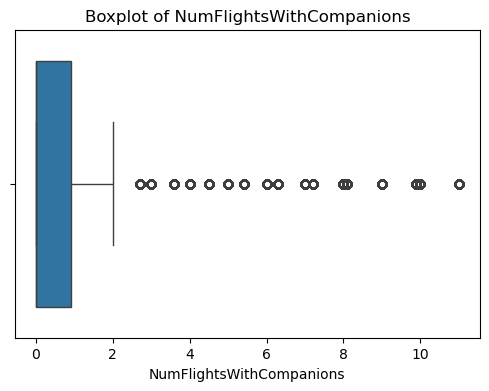

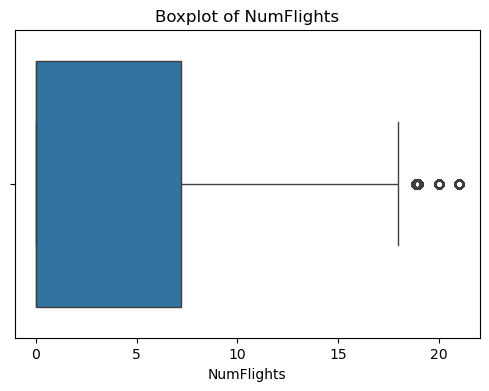

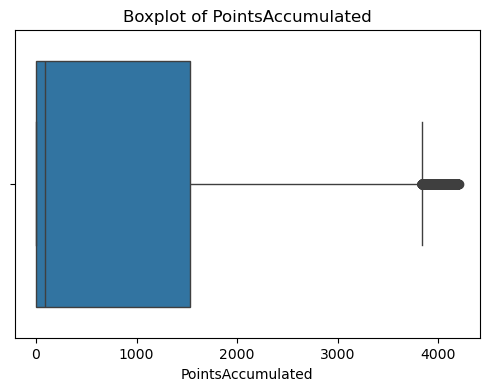

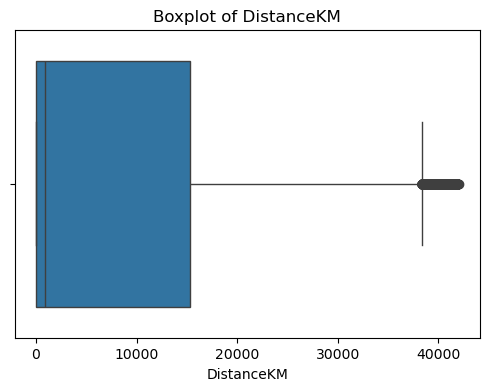

In [28]:

dataFlights_central= dataFlights.copy()



numeric_cols = dataFlights_central.select_dtypes(include='number').columns

outlier_summary = pd.DataFrame(
    columns=['Q1', 'Q3', 'IQR', 'Lower Bound', 'Upper Bound', 'Outlier Count', 'Outlier %']
)

for col in numeric_cols:
    Q1 = dataFlights_central[col].quantile(0.25)
    Q3 = dataFlights_central[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = dataFlights_central[
        (dataFlights_central[col] < lower_bound) | 
        (dataFlights_central[col] > upper_bound)
    ]
    
    outlier_summary.loc[col] = [
        Q1,
        Q3,
        IQR,
        lower_bound,
        upper_bound,
        outliers.shape[0],
        round(outliers.shape[0] / dataFlights_central.shape[0] * 100, 2)
    ]




#I opened the excel and deduced that these were probably the columns with outliers
cols_to_plot = ['NumFlightsWithCompanions', 'NumFlights', 'PointsAccumulated', 'DistanceKM']

for col in cols_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=dataFlights_central[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [29]:
cols_to_clean = ['NumFlightsWithCompanions', 'NumFlights', 'PointsAccumulated', 'DistanceKM']

for col in cols_to_clean:
    Q1 = dataFlights_central[col].quantile(0.25)
    Q3 = dataFlights_central[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    dataFlights_central = dataFlights_central[
        (dataFlights_central[col] >= lower_bound) & 
        (dataFlights_central[col] <= upper_bound)
    ]
    


In [33]:
loyalty_conflicts = (
    dataCustomer_central.groupby("Loyalty#")["Customer Name"]
    .nunique()
    .reset_index(name="UniqueNames")
    .query("UniqueNames > 1")
)

dataCustomer_central["inconsistent_loyalty"] = dataCustomer_central["Loyalty#"].isin(loyalty_conflicts["Loyalty#"])
dataCustomer_central[dataCustomer_central["inconsistent_loyalty"]]

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,inconsistent_loyalty
5,5,193662,Leatrice,Hanlin,Leatrice Hanlin,Canada,Yukon,Whitehorse,60.721188,-135.056840,...,Bachelor,Rural,26262.0,Married,Star,2015-05-07,NaN,3844.57,Standard,True
123,123,746226,Theodora,Sampieri,Theodora Sampieri,Canada,British Columbia,Whistler,50.116322,-122.957360,...,Bachelor,Urban,43177.0,Married,Star,2021-01-17,NaN,4089.04,Standard,True
141,141,279419,Reyes,Sobczak,Reyes Sobczak,Canada,British Columbia,West Vancouver,49.328625,-123.160190,...,College,Urban,0.0,Single,Star,2016-07-03,NaN,4117.37,Standard,True
161,161,354438,Maricela,Veals,Maricela Veals,Canada,Quebec,Montreal,45.501690,-73.567253,...,College,Rural,0.0,Married,Star,2021-09-01,NaN,4167.09,Standard,True
204,204,719633,Elnora,Holzmiller,Elnora Holzmiller,Canada,British Columbia,Victoria,48.428421,-123.365650,...,Bachelor,Suburban,27608.0,Divorced,Star,2019-12-03,NaN,4250.78,Standard,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16488,16488,373638,Sherryl,Vanduyn,Sherryl Vanduyn,Canada,Quebec,Tremblant,46.118462,-74.596184,...,College,Rural,0.0,Single,Star,2021-07-30,NaN,18898.33,Standard,True
16625,16625,727507,Marnie,Kisner,Marnie Kisner,Canada,Alberta,Banff,51.178398,-115.570800,...,Bachelor,Suburban,93011.0,Divorced,Star,2020-12-26,NaN,22643.83,Standard,True
16766,16766,278854,Marylee,Villicana,Marylee Villicana,Canada,Quebec,Tremblant,46.118462,-74.596184,...,High School or Below,Urban,20799.0,Single,Star,2017-08-16,NaN,28328.47,Standard,True
16775,16775,434807,Cira,Nalley,Cira Nalley,Canada,Alberta,Edmonton,53.544388,-113.490930,...,Bachelor,Rural,35296.0,Single,Star,2015-08-27,NaN,29194.37,Standard,True
